## Figshare Data

In [12]:
def extract_dataset_info(html_content):
    """
    Extract dataset names and download URLs from Figshare HTML content.

    Args:
        html_content: Raw HTML string from Figshare dataset page

    Returns:
        List of tuples containing (dataset_name, download_url)
    """
    soup = BeautifulSoup(html_content, "html.parser")
    datasets = []

    # Find all file blocks
    file_blocks = soup.select('div.m9hr9')

    for block in file_blocks:
        # Get dataset name (combining name and extension)
        name_span = block.select_one('span.fGrnU')
        ext_span = block.select_one('span.b\\+koY')  # Escape + in CSS selector

        if name_span and ext_span:
            dataset_name = name_span.text.strip()
            # Remove the dot from extension since it's in the name
            dataset_name = dataset_name + ext_span.text.strip()

            # Find download link
            download_link = block.select_one('a[href*="ndownloader/files"]')
            if download_link and 'href' in download_link.attrs:
                datasets.append((dataset_name, download_link['href']))

    return datasets

# Example usage
html_content = """
<div class="t1FQe" role="button" tabindex="0"><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Houston.</span><span class="b+koY">zip</span><span class="YimXw"> 85.1 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -866px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663501"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -866px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Xianyang.</span><span class="b+koY">zip</span><span class="YimXw"> 4.64 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -818px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663504"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -818px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Milan.</span><span class="b+koY">zip</span><span class="YimXw"> 33.37 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -770px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663507"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -770px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Pune.</span><span class="b+koY">zip</span><span class="YimXw"> 4.94 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -722px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663510"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -722px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">SaintPetersburg.</span><span class="b+koY">zip</span><span class="YimXw"> 59.55 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -674px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663513"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -674px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Atlanta.</span><span class="b+koY">zip</span><span class="YimXw"> 62.8 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -626px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663516"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -626px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Surat.</span><span class="b+koY">zip</span><span class="YimXw"> 432.91 kB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -578px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663519"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -578px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">WashingtonDC.</span><span class="b+koY">zip</span><span class="YimXw"> 103.28 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -530px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663522"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -530px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Bangdung.</span><span class="b+koY">zip</span><span class="YimXw"> 3.33 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -482px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663525"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -482px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Surabaya.</span><span class="b+koY">zip</span><span class="YimXw"> 5.34 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -434px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663531"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -434px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Harbin.</span><span class="b+koY">zip</span><span class="YimXw"> 1.9 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -386px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663534"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -386px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Boston.</span><span class="b+koY">zip</span><span class="YimXw"> 83.42 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(776px, -338px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(29px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663537"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -338px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div><div class="m9hr9"><button data-id="list-view-file" tabindex="-1" class="lPlX1 OFhoB" type="button"><span class="fGrnU">Zhengzhou.</span><span class="b+koY">zip</span><span class="YimXw"> 1.6 MB</span></button><div class="I81zP"><button data-id="list-view-file-action" tabindex="-1" tooltip="View file" class="lPlX1 q5Umu +QOOH" type="button"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="20" class="LwCjj" focusable="false" viewBox="0 0 20 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M20 17.965C20 18.89 16.713 24 10 24c-6.095 0-10-5.134-10-6.035C0 17.161 3.819 12 9.943 12 16.498 12 20 17.161 20 17.965zm-4.887.05c0-2.659-2.301-4.814-5.14-4.814-2.84 0-5.14 2.155-5.14 4.814 0 2.658 2.3 4.813 5.14 4.813 2.839 0 5.14-2.155 5.14-4.813zm-5.14-3.916c-2.31 0-4.183 1.753-4.183 3.916 0 2.163 1.873 3.917 4.183 3.917 2.31 0 4.182-1.753 4.182-3.917 0-2.163-1.873-3.916-4.182-3.916z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2013px, -290px);">View file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(58px, 0px);"></span></span></button><a data-id="list-view-file-action" tabindex="-1" tooltip="Download file" class="lPlX1 q5Umu +QOOH" href="https://figshare.com/ndownloader/files/3663540"><svg aria-hidden="true" fill="transparent" height="36" preserveAspectRatio="xMidYMid meet" width="16" class="LwCjj" focusable="false" viewBox="0 0 16 36" xmlns="https://www.w3.org/2000/svg"><path clip-rule="evenodd" d="m9.807 18.891 1.698-1.66a.82.82 0 0 1 1.14 0l.855.836a.776.776 0 0 1 0 1.114L8.806 23.77a.82.82 0 0 1-1.14 0L2.972 19.18a.776.776 0 0 1 0-1.114l.855-.836a.82.82 0 0 1 1.14 0l1.697 1.659V11a1 1 0 0 1 1-1h1.143a1 1 0 0 1 1 1v7.891zM0 25.5a.5.5 0 0 1 .5-.5h15a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5H.5a.5.5 0 0 1-.5-.5v-1z" fill-rule="evenodd"></path></svg><span aria-hidden="false" class="lnPB1" data-placement="top" data-tooltip-visible="false" style="position: fixed; inset: auto auto 0px 0px; transform: translate(2023px, -290px);">Download file<span class="+2H7L" data-placement="top" data-popper-arrow="true" style="position: absolute; left: 0px; transform: translate(90px, 0px);"></span></span></a></div></div></div>
"""
datasets = extract_dataset_info(html_content)
for name, url in datasets:
    print(f"{name}: {url}")

Houston.zip: https://figshare.com/ndownloader/files/3663501
Xianyang.zip: https://figshare.com/ndownloader/files/3663504
Milan.zip: https://figshare.com/ndownloader/files/3663507
Pune.zip: https://figshare.com/ndownloader/files/3663510
SaintPetersburg.zip: https://figshare.com/ndownloader/files/3663513
Atlanta.zip: https://figshare.com/ndownloader/files/3663516
Surat.zip: https://figshare.com/ndownloader/files/3663519
WashingtonDC.zip: https://figshare.com/ndownloader/files/3663522
Bangdung.zip: https://figshare.com/ndownloader/files/3663525
Surabaya.zip: https://figshare.com/ndownloader/files/3663531
Harbin.zip: https://figshare.com/ndownloader/files/3663534
Boston.zip: https://figshare.com/ndownloader/files/3663537
Zhengzhou.zip: https://figshare.com/ndownloader/files/3663540


In [5]:
# save to a .json file
import json
# Assuming `datasets` is a list of tuples (name, url)
with open('figshare_urls.json', 'w') as f:
    # json.dump([{'name': name, 'url': url} for name, url in datasets], f, indent=4)
    # save to json dictionary
    json.dump({name: url for name, url in datasets}, f, indent=4)

#### Testing Figshare Data

In [1]:
from utils.data_utils import read_figshare_data, download_figshare_data, save_graph, load_graph, preprocess_graph

zip_file_name = download_figshare_data('./parse_test', "Surat")
G = read_figshare_data(zip_file_name)
G = preprocess_graph(G)
save_graph(G, './parse_test/Surat')
G1 = load_graph('./parse_test/Surat')

Successfully downloaded: ./parse_test/Surat/raw/Surat.zip
Reading data: ./parse_test/Surat/raw/Surat.zip
Finished reading data: Surat
Before conversion:
          XCoord        YCoord  START_NODE  END_NODE  EDGE       weight
0  283025.349376  2.328750e+06           1         2     1  1151.599614
1  283041.563939  2.329891e+06           2         1     1  1151.599614
2  283041.563939  2.329891e+06           2         4     2   969.555455
3  283041.563939  2.329891e+06           2         5     4   686.054297
4  282258.518881  2.330450e+06           4         2     2   969.555455
After conversion:
          XCoord        YCoord  START_NODE  END_NODE  EDGE  weight
0  283025.349376  2.328750e+06           1         2     1    1151
1  283041.563939  2.329891e+06           2         1     1    1151
2  283041.563939  2.329891e+06           2         4     2     969
3  283041.563939  2.329891e+06           2         5     4     686
4  282258.518881  2.330450e+06           4         2     2    

In [2]:
from utils.data_utils import print_summary_stats
print_summary_stats(G)
print()
print_summary_stats(G1)

  - Node count: 2508
  - Edge count: 3591
  - Min/Max/Avg degree: 1/6/2.86
  - Min/Max/Avg weight: 1.00/7294.00/244.27
  - No. of connected components: 1

  - Node count: 2508
  - Edge count: 3591
  - Min/Max/Avg degree: 1/6/2.86
  - Min/Max/Avg weight: 1.00/7294.00/244.27
  - No. of connected components: 1


In [3]:
# check for every edge in G1 if it exists in G
for u, v, data in G.edges(data=True):
    if not G1.has_edge(u, v):
        print(f"Edge {u}-{v} with data {data} not found in G")

In [4]:
# check for every node feature in G1 if it exists in G
for node in G.nodes():
    if G.nodes[node] != G1.nodes[node]:
        print(f"Node {node} features in G do not match G1 ({G.nodes[node]} vs {G1.nodes[node]})")

#### Subgraph for testing

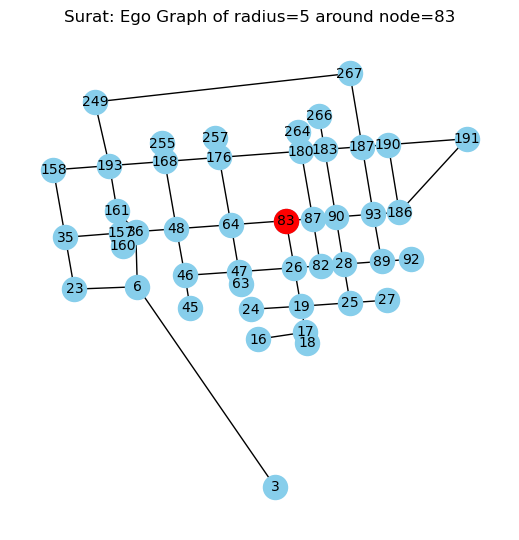

In [8]:
from utils.plot_utils import plot_subgraph
plot_subgraph(G, node=83, use_geo_coordinates=True, radius=5)

In [12]:
import networkx as nx
subgraph = nx.ego_graph(G, n=83, radius=5)

subgraph = preprocess_graph(subgraph)

save_graph(subgraph, './parse_test/Surat_subgraph')

Original graph:
  - Node count: 46
  - Edge count: 62
  - Min/Max/Avg degree: 1/4/2.70
  - Min/Max/Avg weight: 75.00/1806.00/336.35
  - No. of connected components: 1
Re-indexing the nodes...
Min/Max node labels before re-indexing: 3/267
Min/Max node labels after re-indexing: 0/45
Preprocessing complete.
Processed graph:
  - Node count: 46
  - Edge count: 62
  - Min/Max/Avg degree: 1/4/2.70
  - Min/Max/Avg weight: 75.00/1806.00/336.35
  - No. of connected components: 1
Saving edges: ./parse_test/Surat_subgraph/Surat_subgraph.edges
Saving nodes: ./parse_test/Surat_subgraph/Surat_subgraph.nodes


Reading edges: ./parse_test/Surat_subgraph/Surat_subgraph.edges
Reading nodes: ./parse_test/Surat_subgraph/Surat_subgraph.nodes


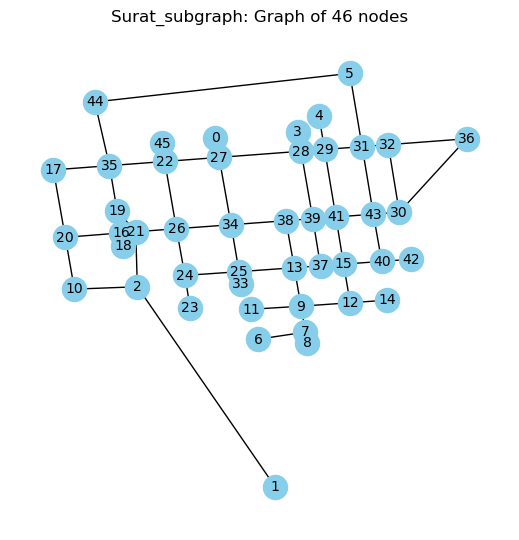

In [13]:
G1 = load_graph('./parse_test/Surat_subgraph')
plot_subgraph(G1, use_geo_coordinates=True)

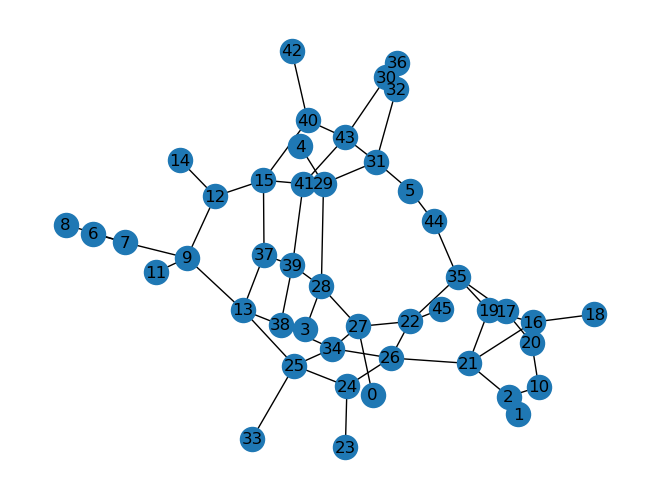

In [11]:
nx.draw(subgraph, with_labels=True)

In [9]:
subgraph.nodes(data=True)

NodeDataView({0: {'feature': [282836.07195697, 2333211.69210372]}, 1: {'feature': [283136.17664843, 2330551.21827265]}, 2: {'feature': [282442.60635303, 2332076.26882886]}, 3: {'feature': [283250.38314028, 2333257.25562205]}, 4: {'feature': [283356.84151589, 2333382.24570048]}, 5: {'feature': [283512.80730856, 2333704.42742637]}, 6: {'feature': [283051.22871508, 2331676.13073361]}, 7: {'feature': [283289.36142733, 2331730.08973288]}, 8: {'feature': [283298.47026918, 2331650.15476168]}, 9: {'feature': [283266.84792584, 2331927.80305186]}, 10: {'feature': [282125.73930725, 2332058.13375642]}, 11: {'feature': [283016.30239155, 2331904.42979831]}, 12: {'feature': [283514.51097819, 2331954.196837]}, 13: {'feature': [283233.36206501, 2332221.76697998]}, 14: {'feature': [283701.95672429, 2331974.17169299]}, 15: {'feature': [283481.37310972, 2332248.86406174]}, 16: {'feature': [282359.49037891, 2332487.03047397]}, 17: {'feature': [282019.83655227, 2332968.1751513]}, 18: {'feature': [282371.370

In [10]:
subgraph.edges(data=True)

EdgeDataView([(0, 27, {'weight': 149}), (1, 2, {'weight': 1806}), (2, 10, {'weight': 331}), (2, 21, {'weight': 423}), (3, 28, {'weight': 147}), (4, 29, {'weight': 259}), (5, 31, {'weight': 562}), (5, 44, {'weight': 1313}), (6, 7, {'weight': 263}), (7, 8, {'weight': 80}), (7, 9, {'weight': 198}), (9, 11, {'weight': 251}), (9, 12, {'weight': 249}), (9, 13, {'weight': 295}), (10, 20, {'weight': 397}), (12, 14, {'weight': 188}), (12, 15, {'weight': 296}), (13, 25, {'weight': 280}), (13, 37, {'weight': 132}), (13, 38, {'weight': 361}), (15, 37, {'weight': 116}), (15, 40, {'weight': 193}), (15, 41, {'weight': 361}), (16, 20, {'weight': 281}), (16, 21, {'weight': 75}), (16, 18, {'weight': 100}), (16, 19, {'weight': 169}), (17, 20, {'weight': 518}), (17, 35, {'weight': 284}), (19, 21, {'weight': 187}), (19, 35, {'weight': 347}), (21, 26, {'weight': 206}), (22, 26, {'weight': 516}), (22, 35, {'weight': 280}), (22, 27, {'weight': 275}), (22, 45, {'weight': 139}), (23, 24, {'weight': 249}), (24, 

## DIMACS Data

In [ ]:
html_content = """
<table border="0" cellspacing="1" cellpadding="4" width="100%">
			<tbody><tr bgcolor="#BBBBBB">
				<td>Name</td>
				<td>Description</td>
				<td># nodes</td>
				<td># arcs</td>
				<td>Longitude</td>
				<td>Latitude</td>
				<td>Distance graph</td>
				<td>Travel time graph</td>
				<td>Coordinates</td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>USA</strong></td>
				<td>Full USA</td>
				<td>
					<div align="right">
							23,947,347</div>
				</td>
				<td>
					<div align="right">
							58,333,344</div>
				</td>
				<td>-</td>
				<td>-</td>
				<td><a href="data/USA-road-d/USA-road-d.USA.gr.gz">gr.gz file, 335 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.USA.gr.gz">gr.gz file, 342 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.USA.co.gz">co.gz file, 218 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>CTR</strong></td>
				<td>Central USA</td>
				<td>
					<div align="right">
						14,081,816 </div>
				</td>
				<td>
					<div align="right">
							34,292,496</div>
				</td>
				<td>[25.0; 50.0]</td>
				<td>[79.0; 100.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.CTR.gr.gz">gr.gz file, 195 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.CTR.gr.gz">gr.gz file, 198 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.CTR.co.gz">co.gz file, 139 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>W</strong></td>
				<td>Western USA</td>
				<td>
					<div align="right">
							6,262,104</div>
				</td>
				<td>
					<div align="right">
							15,248,146</div>
				</td>
				<td>[27.0; 50.0]</td>
				<td>[100.0; 130.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.W.gr.gz">gr.gz file, 86 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.W.gr.gz">gr.gz file, 88 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.W.co.gz">co.gz file, 57 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>E</strong></td>
				<td>Eastern USA</td>
				<td>
					<div align="right">
							3,598,623</div>
				</td>
				<td>
					<div align="right">
							8,778,114</div>
				</td>
				<td>[24.0; 50.0]</td>
				<td>[-infty; 79.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.E.gr.gz">gr.gz file, 49 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.E.gr.gz">gr.gz file, 50 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.E.co.gz">co.gz file, 32 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>LKS</strong></td>
				<td>Great Lakes</td>
				<td>
					<div align="right">
							2,758,119</div>
				</td>
				<td>
					<div align="right">
							6,885,658</div>
				</td>
				<td>[41.0; 50.0]</td>
				<td>[74.0; 93.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.LKS.gr.gz">gr.gz file, 38 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.LKS.gr.gz">gr.gz file, 39 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.LKS.co.gz">co.gz file, 24 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>CAL</strong></td>
				<td>California and Nevada</td>
				<td>
					<div align="right">
							1,890,815</div>
				</td>
				<td>
					<div align="right">
							4,657,742</div>
				</td>
				<td>[32.5; 42.0]</td>
				<td>[114.0; 125.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.CAL.gr.gz">gr.gz file, 26 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.CAL.gr.gz">gr.gz file, 26 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.CAL.co.gz">co.gz file, 16 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>NE</strong></td>
				<td>Northeast USA</td>
				<td>
					<div align="right">
							1,524,453</div>
				</td>
				<td>
					<div align="right">
							3,897,636</div>
				</td>
				<td>[39.5, 43.0]</td>
				<td>[-infty; 76.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.NE.gr.gz">gr.gz file, 21 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.NE.gr.gz">gr.gz file, 21 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.NE.co.gz">co.gz file, 13 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>NW</strong></td>
				<td>Northwest USA</td>
				<td>
					<div align="right">
							1,207,945</div>
				</td>
				<td>
					<div align="right">
							2,840,208</div>
				</td>
				<td>[42.0; 50.0]</td>
				<td>[116.0; 126.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.NW.gr.gz">gr.gz file, 15 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.NW.gr.gz">gr.gz file, 16 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.NW.co.gz">co.gz file, 11 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>FLA</strong></td>
				<td>Florida</td>
				<td>
					<div align="right">
							1,070,376</div>
				</td>
				<td>
					<div align="right">
							2,712,798</div>
				</td>
				<td>[24.0; 31.0]</td>
				<td>[79; 87.5]</td>
				<td><a href="data/USA-road-d/USA-road-d.FLA.gr.gz">gr.gz file, 14 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.FLA.gr.gz">gr.gz file, 14 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.FLA.co.gz">co.gz file, 8.6 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>COL</strong></td>
				<td>Colorado</td>
				<td>
					<div align="right">
							435,666</div>
				</td>
				<td>
					<div align="right">
							1,057,066</div>
				</td>
				<td>[37.0; 41.0]</td>
				<td>[102.0; 109.0]</td>
				<td><a href="data/USA-road-d/USA-road-d.COL,gr.gz file, 5.5 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.COL.gr.gz">gr.gz file, 5.6 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.COL.co.gz">co.gz file, 3.8 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>BAY</strong></td>
				<td>San Francisco Bay Area</td>
				<td>
					<div align="right">
							321,270</div>
				</td>
				<td>
					<div align="right">
							800,172</div>
				</td>
				<td>[37.0; 39.0]</td>
				<td>[121; 123]</td>
				<td><a href="s">gr.gz file, 3.9 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.BAY.gr.gz">gr.gz file, 4.0 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.BAY.co.gz">co.gz file, 2.5 MB</a></td>
			</tr>
			<tr bgcolor="#eeeeee">
				<td><strong>NY</strong></td>
				<td>New York City</td>
				<td>
					<div align="right">
							264,346</div>
				</td>
				<td>
					<div align="right">
							733,846</div>
				</td>
				<td>[40.3; 41.3]</td>
				<td>[73.5; 74.5]</td>
				<td><a href="data/USA-road-d/USA-road-d.NY.gr.gz">gr.gz file, 3.5 MB</a></td>
				<td><a href="data/USA-road-t/USA-road-t.NY.gr.gz">gr.gz file, 3.6 MB</a></td>
				<td><a href="data/USA-road-d/USA-road-d.NY.co.gz">co.gz file, 2.0 MB</a></td>
			</tr>
		</tbody></table>
    """

from bs4 import BeautifulSoup


In [11]:
from utils.data_utils import download_dimacs_data, read_dimacs_data, save_graph, load_graph, preprocess_graph

graph_file_name, coordinates_file_name = download_dimacs_data('./parse_test', "NY")
print(f"Graph file: {graph_file_name}")
print(f"Coordinates file: {coordinates_file_name}")
G = read_dimacs_data(graph_file_name, coordinates_file_name)
G = preprocess_graph(G)
save_graph(G, './parse_test/NY')
G1 = load_graph('./parse_test/NY')

Attempt 1 failed: HTTPSConnectionPool(host='www.diag.uniroma1.it', port=443): Max retries exceeded with url: /challenge9/data/USA-road-d/USA-road-d.NY.gr.gz (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1017)')))
Retrying in 2 seconds...
Successfully downloaded: ./parse_test/NY/raw/USA-road-d.NY.gr.gz
Attempt 1 failed: HTTPSConnectionPool(host='www.diag.uniroma1.it', port=443): Max retries exceeded with url: /challenge9/data/USA-road-d/USA-road-d.NY.co.gz (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1017)')))
Retrying in 2 seconds...
Successfully downloaded: ./parse_test/NY/raw/USA-road-d.NY.co.gz
Graph file: ./parse_test/NY/raw/USA-road-d.NY.gr.gz
Coordinates file: ./parse_test/NY/raw/USA-road-d.NY.co.gz
Reading edge data: ./parse_test/NY/raw/USA-road-d.NY.gr.gz
Number of edges found: 733846
START_NODE    int64
END_NODE      int64
weight     

In [12]:
from utils.data_utils import print_summary_stats
print_summary_stats(G)
print()
print_summary_stats(G1)

  - Node count: 264346
  - Edge count: 365050
  - Min/Max/Avg degree: 1/8/2.76
  - Min/Max/Avg weight: 1.00/36946.00/1293.25
  - No. of connected components: 1

  - Node count: 264346
  - Edge count: 365050
  - Min/Max/Avg degree: 1/8/2.76
  - Min/Max/Avg weight: 1.00/36946.00/1293.25
  - No. of connected components: 1


In [13]:
# check for every edge in G1 if it exists in G
for u, v, data in G.edges(data=True):
    if not G1.has_edge(u, v):
        print(f"Edge {u}-{v} with data {data} not found in G")

In [14]:
# check for every node feature in G1 if it exists in G
for node in G.nodes():
    if G.nodes[node] != G1.nodes[node]:
        print(f"Node {node} features in G do not match G1 ({G.nodes[node]} vs {G1.nodes[node]})")